## [Image Processing in OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

In [2]:
#Changing Color-space
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces

import cv2
flags=[i for i in dir(cv2) if i.startswith('COLOR_')]
# flags [COLOR_BAYER_BG2BGR,COLOR_BAYER_BG2BGRA,...]

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def show_rgb(img):
    plt.subplot()
    plt.imshow(img)
    plt.show()
    
def show_bgr(img):
    plt.subplot()
    plt.imshow(img[:,:,::-1])
    plt.show()
    
leica=cv2.imread('./images/leica.jpg')
#logo本来是红色的，因为颜色空间是bgr,当作rgb来显示了

#颜色空间转换
leica_rgb=cv2.cvtColor(leica,cv2.COLOR_BGR2RGB)
show_rgb(np.hstack([leica,leica_rgb]))

In [5]:
leica_hsv=cv2.cvtColor(leica,cv2.COLOR_BGR2HSV)
leica_hsv.max(),leica_hsv.min()

#cv2中HSV（色相／饱和度／明度）
#For HSV, Hue range is [0,179], 
#Saturation range is [0,255] 
#and Value range is [0,255]
#In HSV, it is more easier to represent a color than RGB color-space.
# HSV其实就是一个调色板，与绘画颜料一样，很直观；不像RGB呈现出的颜色需要考虑三通道混合
# 另外，在画面物体提取的时候，HSV直接选取对应物体的色相，也更方便

(255, 0)

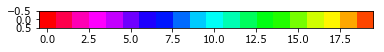

In [7]:
hues=cv2.imread('images/hues.jpg')
show_bgr(hues)

In [8]:
hues_hsv=cv2.cvtColor(hues,cv2.COLOR_BGR2HSV)

"""
从下面数值可以看出：
红橙黄绿青蓝紫在色相数值的映射为0-180
"""
hues_hsv

array([[[  0, 255, 254],
        [171, 255, 255],
        [159, 255, 255],
        [150, 255, 255],
        [143, 255, 255],
        [133, 255, 255],
        [124, 255, 254],
        [117, 255, 255],
        [108, 254, 255],
        [ 96, 255, 255],
        [ 89, 255, 255],
        [ 81, 255, 255],
        [ 71, 255, 254],
        [ 62, 254, 255],
        [ 56, 255, 254],
        [ 46, 254, 255],
        [ 36, 254, 255],
        [ 29, 255, 255],
        [ 20, 255, 254],
        [  8, 255, 254]]], dtype=uint8)

In [ ]:
#Object Tracking
"""
现在我有一个水杯，盖子蓝色偏青，对应色相差不多在上面色相条的中间位置偏右一点点
估计色相在80-120之间

现在修改demo提取水杯
demo链接（Object Tracking）：
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces
"""

import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_cyan = np.array([80,50,50])
    upper_cyan = np.array([120,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_cyan, upper_cyan)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()


捕获效果如下图：
![](https://upload-images.jianshu.io/upload_images/1271438-25e0c7f895772794.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### [Geometric Transformations of Images(图片的几何变换)](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations)

* 画面移动的本质：根据移动量，找到移动后与移动前坐标的映射关系，以此实现移动前像素值的重新分布

* 图像的几何变换主要包括：平移、扩大与缩小、旋转、仿射、透视等


[Python实现图像平移、旋转、水平镜像等](https://blog.csdn.net/LZH2912/article/details/78712881)

In [15]:
#图片缩放
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_bgr(img):
    plt.subplot()
    plt.imshow(img[:,:,::-1])
    plt.show()
    
leica=cv2.imread('images/leica.jpg')
leica_resized=cv2.resize(leica,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
leica.shape,leica_resized.shape

((375, 500, 3), (188, 250, 3))

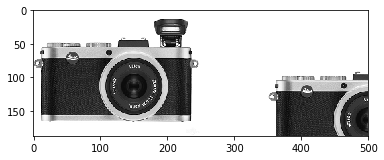

In [32]:

leica_gray=cv2.cvtColor(leica_resized,cv2.COLOR_BGR2GRAY)

def show_gray(img):
    plt.subplot()
    plt.imshow(img)
    plt.gray()
    plt.show()


class ImgTansform():
    def __init__(self,image,rows,cols,center=[0,0]):
        self.src=image
        self.rows=rows
        self.cols=cols
        self.center=center
    
    def move(self,delta_x,delta_y):
        """
        平移前坐标（x,y）,平移后坐标(x',y'),则满足：
        x' = x + Tx
        y' = y + Ty

        转换成矩阵关系如下：
        (x',y',1)=(x,y,1)*  [[1,0,0],[0,1,0][Tx,Ty,1]]
        """
        self.transform=np.array([[1,0,delta_x],[0,1,delta_y],[0,0,1]])
        return self.process()
        

    def process(self):
        self.dst=np.zeros((self.rows,self.cols),dtype=np.uint8)
        for i in range(self.rows):
            for j in range(self.cols):
                src_pos=np.array([i-self.center[0],j-self.center[1],1])
                [x,y,z]=np.dot(self.transform,src_pos)
                x=int(x)+self.center[0]
                y=int(y)+self.center[1]

                if x>=self.rows or y>=self.cols or x<0 or y<0:
                    self.dst[i][j]=255
                else:
                    self.dst[i][j]=self.src[x][y]
        return self.dst
                    
                    
transform=ImgTansform(leica_gray,leica_gray.shape[0],leica_gray.shape[1])
moved=transform.move(-50,-100)
show_gray(np.hstack([leica_gray,moved]))